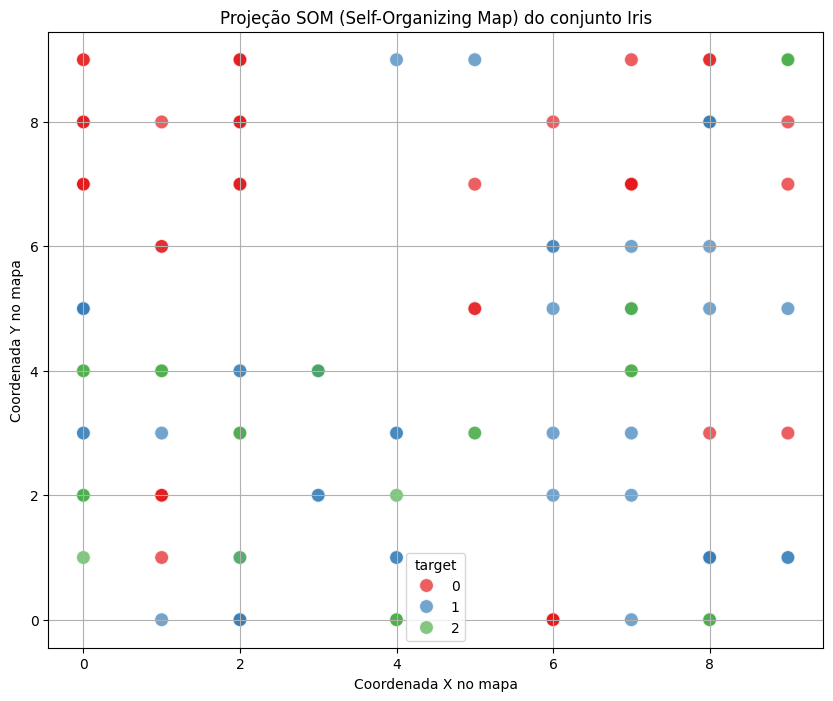

In [3]:
# Requer: pip install minisom matplotlib seaborn scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from minisom import MiniSom
import seaborn as sns
import pandas as pd

# Carrega o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Normalização dos dados
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Cria e treina o SOM
som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, 100)

# Mapeia os dados para coordenadas no SOM
coordinates = np.array([som.winner(x) for x in X])
df_result = pd.DataFrame(coordinates, columns=['x', 'y'])
df_result['target'] = y

# Visualização
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_result, x='x', y='y', hue='target', palette='Set1', s=100, alpha=0.7)
plt.title('Projeção SOM (Self-Organizing Map) do conjunto Iris')
plt.xlabel('Coordenada X no mapa')
plt.ylabel('Coordenada Y no mapa')
plt.grid(True)
plt.show()
